###  Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 

### Elementary Cellular Automata Rule Set

In [2]:
def rules(prev, curr, succ):
    global ruleset

    if( prev == 1 and curr == 1 and succ == 1): return ruleset[0]
    if( prev == 1 and curr == 1 and succ == 0): return ruleset[1]
    if( prev == 1 and curr == 0 and succ == 1): return ruleset[2]
    if( prev == 1 and curr == 0 and succ == 0): return ruleset[3]
    if( prev == 0 and curr == 1 and succ == 1): return ruleset[4]
    if( prev == 0 and curr == 1 and succ == 0): return ruleset[5]
    if( prev == 0 and curr == 0 and succ == 1): return ruleset[6]
    if( prev == 0 and curr == 0 and succ == 0): return ruleset[7]

### Steps

In [3]:
def step(currstep, matrix):
    global row
    global col
    
    prevstep = currstep -1
    for index, y in enumerate(matrix[currstep]):
        prev = matrix[prevstep][(index - 1) % col]
        curr = matrix[prevstep][index]
        succ = matrix[prevstep][(index + 1) % col]
        matrix[currstep][index] = rules(prev, curr, succ)
    return

### Elementary Cellular Automata

In [4]:
def ElementaryCA(matrix):
    global row
    global col
    for x in range(1,row): #skip first row
        step(x,matrix)

### Animate

In [5]:
def animate(i):    
    ax.clear()  # clear the plot
    ax.set_axis_off()  # disable axis
    
    Y = np.zeros((row, col), dtype=np.int8)  # initialize with all zeros
    upper_boundary = (i + 1) * iterations_per_frame  # window upper boundary
    lower_boundary = 0 if upper_boundary <= col else upper_boundary - col 
    for t in range(lower_boundary, upper_boundary):  # assign the values
        Y[t - lower_boundary, :] = matrix[t, :]
    
    img = ax.imshow(Y, interpolation='nearest',cmap='viridis')
    plt.gcf().text(0.15, 0.1, 'by Gelson Sze and Shane Enriquez', fontsize=18, fontfamily='Verdana')
    return [img]

### Program

GIF successfully created!


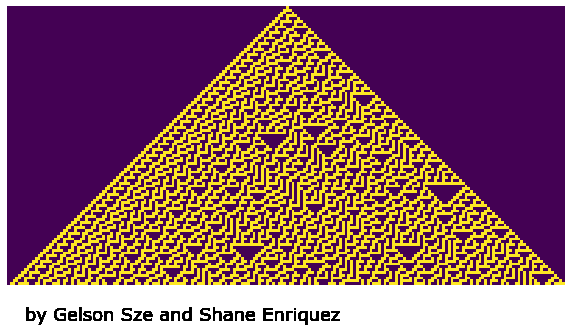

In [9]:
# Setup
matrix = np.zeros_like(a=0,shape=(100,200)) # Cellular Automata setup 100 steps for 200 element array 
rule = 30 # Elementary CA Rule number
iterations_per_frame = 1  # how many steps to show per frame
interval=50  # interval in ms between consecutive frames

if(rule >= 0 and rule <=255):
    # Global variables
    (row,col) = matrix.shape
    ruleset = f'{rule:08b}' # 8 bit binary representation of the rule
    
    middle = round(col/2)
    matrix[0][middle] = 1 # Set the middle of the first row as black
    ElementaryCA(matrix)
    
    fig = plt.figure(figsize=(10, 6))
    frames = int(row // iterations_per_frame)  # frames in the animation
    ax = plt.axes()
    ax.set_axis_off()
    
    anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
    anim.save('ElementaryCA.gif', writer='pillow', savefig_kwargs = dict(facecolor='#9c9cb8')) 
    
    print("GIF successfully created!")
    
else:
    print("Invalid ruleset")